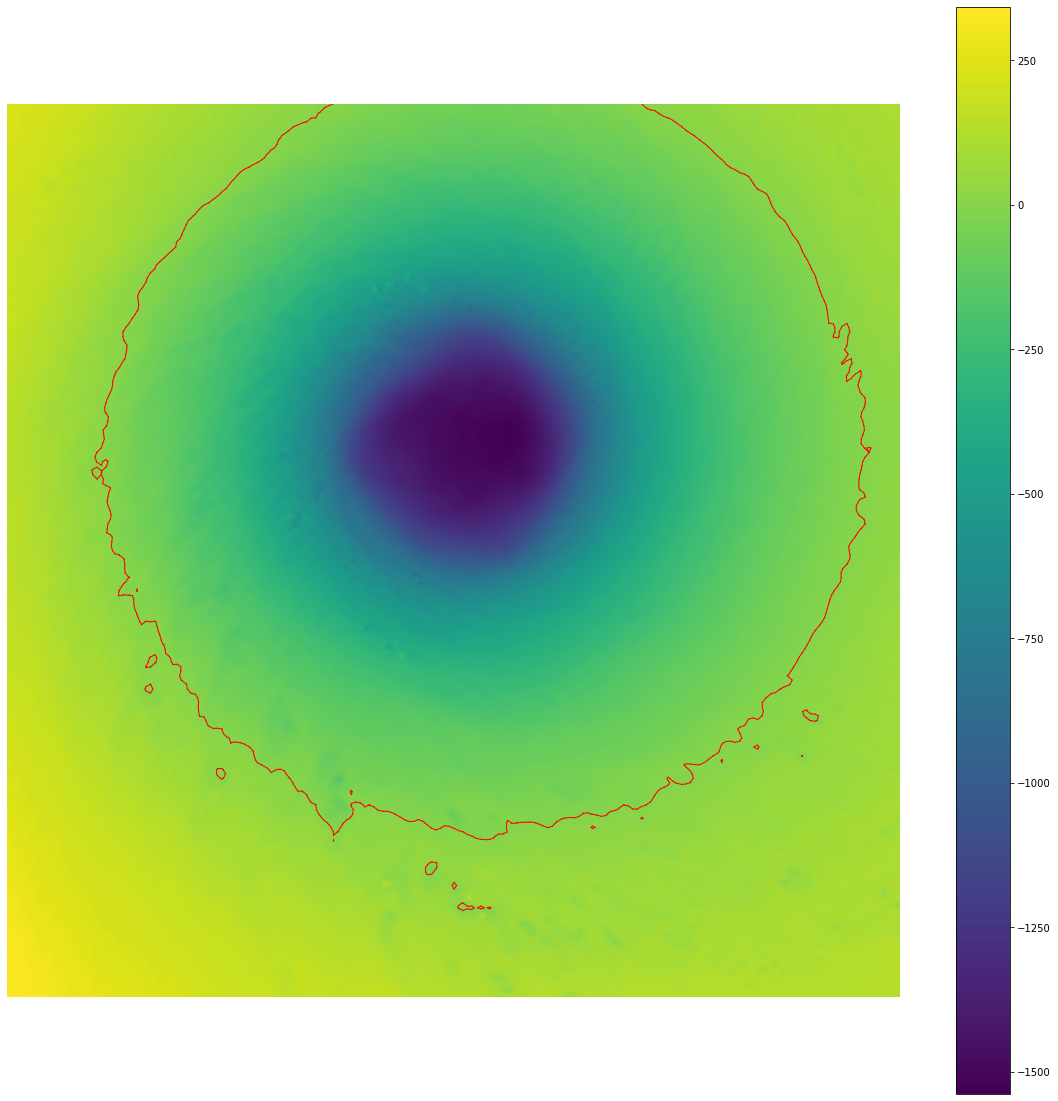

In [48]:
import numpy as np
import matplotlib.pyplot as plt

data2D = 0
data2DPlot = 0

##### draw a line segment between [x0, y0] -> [x1, y1]. color: color of the line semgne
##### DO NOT modify this function
def plotOneEdge(x0, y0, x1, y1, color="white"):
#     plt.plot([y0*5,y1*5], [x0*5,x1*5], linewidth=1, color=color)
    plt.plot([x0*5,x1*5], [y0*5,y1*5], linewidth=1, color=color)

##### x, y: location. Return: data value at [x,y]
##### DO NOT modify this function
def getDataValue(x, y):
    return data2D[x, y]

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize():
    global data2D
    global data2DPlot
    data2D = np.load("rawData.npy").transpose()
    data2DPlot = np.load("plotData.npy")

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')
    plt.imshow(data2DPlot)
    plt.colorbar()

##### (TODO) WORK on this function
#####compute and draw the isocontour of the given datavalue ("isovalue")
#####color: isocontour color
##### you should use "getDataVlue()" to get the data you want and use "plotOneEdge()" to a segment of the isocontour
##### I do not mind the computation is efficnet or not
def countV(lowValue, highValue, isoValue):
    ret = float(abs(lowValue - isoValue))/float(abs(lowValue - highValue))
    return ret
    
def computePlotIsoContour( isovalue, color ):
    for x in range(199):
        for y in range(199):
            data = [getDataValue(x, y), getDataValue(x + 1, y), getDataValue(x + 1, y + 1), getDataValue(x, y + 1)]
            bData = [data[0] >= 0, data[1] >= 0, data[2] >= 0, data[3] >= 0]
            if   bData == [0, 0, 0, 1] or bData == [1, 1, 1, 0]:
                plotOneEdge(x, y + countV(data[0], data[3], isovalue), x + countV(data[3], data[2], isovalue), y + 1, color)
            elif bData == [0, 0, 1, 0] or bData == [1, 1, 0, 1]:
                plotOneEdge(x + countV(data[3], data[2], isovalue), y + 1, x + 1, y + countV(data[1], data[2], isovalue), color)
            elif bData == [0, 0, 1, 1] or bData == [1, 1, 0, 0]:
                plotOneEdge(x, y + countV(data[0], data[3], isovalue), x + 1, y + countV(data[1], data[2], isovalue), color)
            elif bData == [1, 0, 0, 0] or bData == [0, 1, 1, 1]:
                plotOneEdge(x, y + countV(data[0], data[3], isovalue), x + countV(data[0], data[1], isovalue), y, color)
            elif bData == [0, 1, 1, 0] or bData == [1, 0, 0, 1]:
                plotOneEdge(x + countV(data[0], data[1], isovalue), y, x + countV(data[3], data[2], isovalue), y + 1, color)
            elif bData == [0, 1, 0, 1]:
                plotOneEdge(x, y + countV(data[0], data[3], isovalue), x + countV(data[0], data[1], isovalue), y, color)
                plotOneEdge(x + countV(data[3], data[2], isovalue), y + 1, x + 1, y + countV(data[1], data[2], isovalue), color)
            elif bData == [1, 0, 1, 1] or bData == [0, 1, 0, 0]:
                plotOneEdge(x + countV(data[0], data[1], isovalue), y, x + 1, y + countV(data[1], data[2], isovalue), color)
            elif bData == [1, 0, 1, 0]:
                plotOneEdge(x, y + countV(data[0], data[3], isovalue), x + countV(data[3], data[2], isovalue), y + 1, color)
                plotOneEdge(x + countV(data[0], data[1], isovalue), y, x + 1, y + countV(data[1], data[2], isovalue), color)

##### main 
Initialize()
##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(0, "red")

plt.show()